<a href="https://colab.research.google.com/github/eliabrodsky/finance/blob/main/Stock_Peak_Picking_Peak_Visualization_using_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, install yfinance library for stock data

In [1]:
!pip install yfinance -q

     |████████████████████████████████| 62 kB 596 kB/s 


In [2]:
!pip install matplotlib pendulum -q

     |████████████████████████████████| 155 kB 6.2 MB/s 
     |████████████████████████████████| 489 kB 43.7 MB/s 


In [3]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 135 kB/s 


In [4]:
import plotly.graph_objects as go
import pandas as pd

import yfinance as yf
import pendulum
import pandas as pd
from scipy.signal import find_peaks

price_history = yf.Ticker('TSLA').history(period='1y', # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
                                   interval='1d', # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
                                   actions=False)
time_series = list(price_history['Open'])
dt_list = [pendulum.parse(str(dt)).float_timestamp for dt in list(price_history.index)]

time_series = price_history.Close

indices = find_peaks(time_series)[0]
#indices = find_peaks(time_series, threshold=3)[1]

fig = go.Figure(data=go.Scatter(
    y = time_series,
    mode = 'lines'
))

j=0

fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[i] for i in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

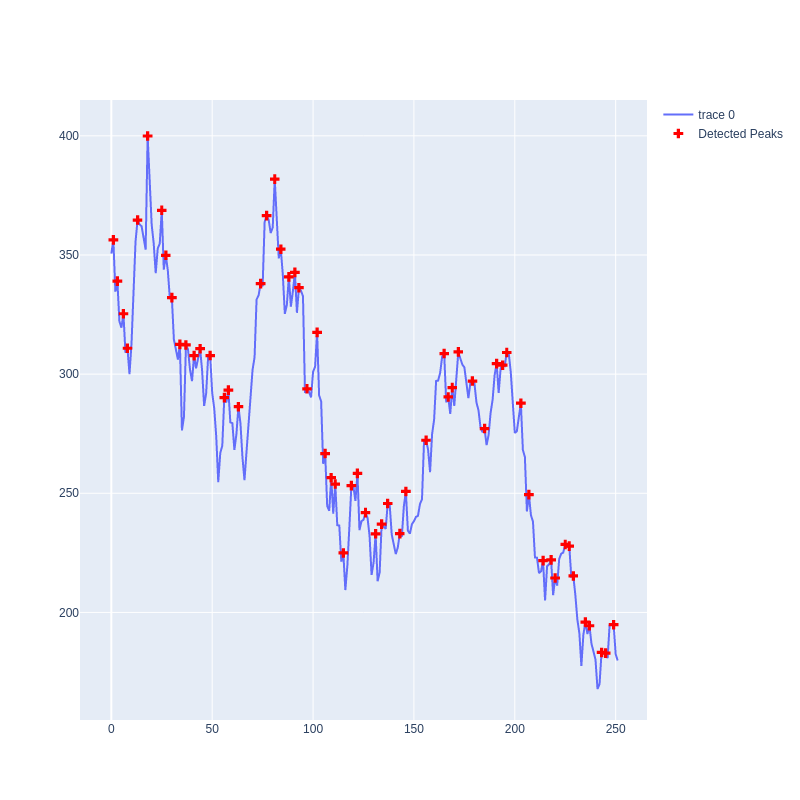

In [5]:
from IPython.display import Image

img_bytes = fig.to_image(format="png", width=800, height=800, scale=1)
Image(img_bytes)

In [6]:
indices = find_peaks(time_series)[0]
indices

array([  1,   3,   6,   8,  13,  18,  25,  27,  30,  34,  37,  41,  44,
        49,  56,  58,  63,  74,  77,  81,  84,  88,  91,  93,  97, 102,
       106, 109, 111, 115, 119, 122, 126, 131, 134, 137, 143, 146, 156,
       165, 167, 169, 172, 179, 185, 191, 194, 196, 203, 207, 214, 218,
       220, 225, 227, 229, 235, 237, 243, 245, 249])